In [1]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd

from torch.utils.data import DataLoader
from src.data import MovingMnistDataset
import matplotlib.pyplot as plt
import torch.optim as optim
import tqdm

from src.dl_models.unet import UNet 

In [21]:
def plot_seq(indxs, data):
    fig = plt.figure(figsize=(8, 8))
    columns = 20
    rows = 1
    for i in range(1, columns*rows +1):
        img = data[i-1, :, :]
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()    

In [13]:
path = 'data/moving_mnist/mm_train/'
csv = 'data/moving_mnist/toy_moving_mnist.csv'
mnist_ds = MovingMnistDataset(path=path, csv=csv, shuffle=True)
print(len(mnist_ds))
mnist_dl = DataLoader(mnist_ds, batch_size=5)

for (curr_seq, idxs, inputs, target) in mnist_dl:
    print(input.size())
    print(target.size())
    print(idxs)
    break

5100
torch.Size([5, 3, 64, 64])
torch.Size([5, 64, 64])
tensor([[0, 1, 2, 3],
        [1, 2, 3, 4],
        [2, 3, 4, 5],
        [3, 4, 5, 6],
        [4, 5, 6, 7]])


# Next section is training on the data

In [4]:
# Setup
path = 'data/moving_mnist/mm_train/'
csv = 'data/moving_mnist/toy_moving_mnist.csv'

# Set device
USE_CUDA = True
device = torch.device('cuda' if torch.cuda.is_available()
                      and USE_CUDA else 'cpu')
print(device)

# Hyperparameters
n_channels=3
n_classes=1
lr=0.001

# Load data
mnist_dataset = MovingMnistDataset(path=path, csv=csv, shuffle=True)
loader = DataLoader(mnist_dataset, batch_size=50)

# Initialize network
model = UNet(n_channels=n_channels, n_classes=n_classes, bilinear=True).to(device)
model.train()

# Loss and optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.MSELoss()

# Needed variables
LOSS_HISTORY = []
EPOCHS = [1 ,2]
LOADER_LEN = len(loader)
print(LOADER_LEN)
# Training
for epoch in EPOCHS:
    with tqdm(loader, unit="batch") as tepoch:
        for (curr_seq, idxs, inputs, targets) in tepoch:
            print("jaja")
            tepoch.set_description(f"Epoch {epoch}")

            # if loader_idx%1000 == 0:
            #     print(f'Epoch {epoch}: {(loader_idx/LOADER_LEN*100):.2f} %.')
            
            # Split data from target
            inputs = inputs.to(device=device)
            
            target = targets.unsqueeze(dim=1)
            targets = targets.to(device=device)

            scores = model(inputs)

            loss = criterion(scores, targets)

            optimizer.zero_grad()
            loss.backward()

            optimizer.step()

            tepoch.set_postfix(loss=loss.item())

            LOSS_HISTORY.append(loss)



cuda
102


TypeError: 'module' object is not callable

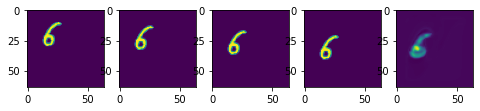

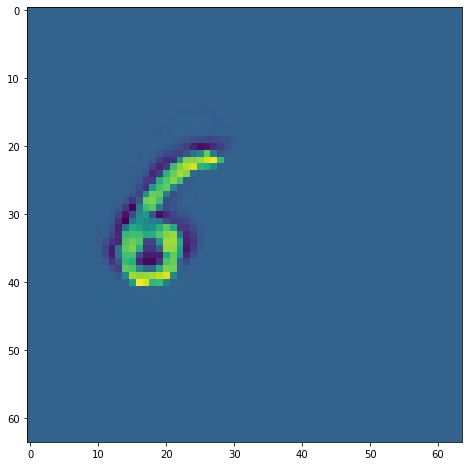

In [9]:
model.eval()

mnist_dataset = MovingMnistDataset(path=path, csv=csv, shuffle=True)
loader = DataLoader(mnist_dataset)

# forward pass
(curr_seq, idxs, data) = iter(loader).next()

input = data[:, :3, :, :] 
input = input.to(device=device)

target = torch.unsqueeze(data[:,3, :, :], 1)
target = target.to(device=device)

scores = model(input)

fig = plt.figure(figsize=(8, 8))
columns = 5
rows = 1
for i in range(1, columns*rows -1):
    img = input[:, i-1, :, :].squeeze().cpu().numpy()
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)

fig.add_subplot(rows, columns, 4)
plt.imshow(target.squeeze().cpu().detach().numpy())


fig.add_subplot(rows, columns, 5)
plt.imshow(scores.squeeze().cpu().detach().numpy())
plt.show()    


# Print the difference
plt.figure(figsize=(8, 8))

diff = target.squeeze().cpu().detach().numpy() - scores.squeeze().cpu().detach().numpy()
plt.imshow(diff)
plt.show()


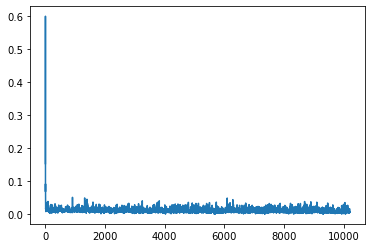

In [5]:
plt.figure()
plt.plot(LOSS_HISTORY)